# Main Library

In [1]:
# Readong Data And Visulization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Preprocessing & Evaliation 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Building Model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# XGBoost
import xgboost as xgb

In [2]:
# Reading Data

data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\BigMart Sales Data\Train.csv")
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
# Removing Columns Item_Identifier

data.drop(columns=["Item_Identifier", "Outlet_Identifier"], axis=1, inplace=True)
data.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# information From Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [5]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### All Columns Are Full Without ==> ["item_weight", "outlet_size"]

### Columns ==> DataType Object And I need To Fill Missing Value
        Outlet_Type, Outlet_Location_Type, Outlet_Size, Item_Fat_Content, Item_Type

In [6]:
# Fill Missing Value

data["Item_Weight"].fillna(data["Item_Weight"].mean(), inplace=True)

data["Outlet_Size"].fillna(data["Outlet_Size"].value_counts().index[0], inplace=True)
    
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
# Some Describtion For Data

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


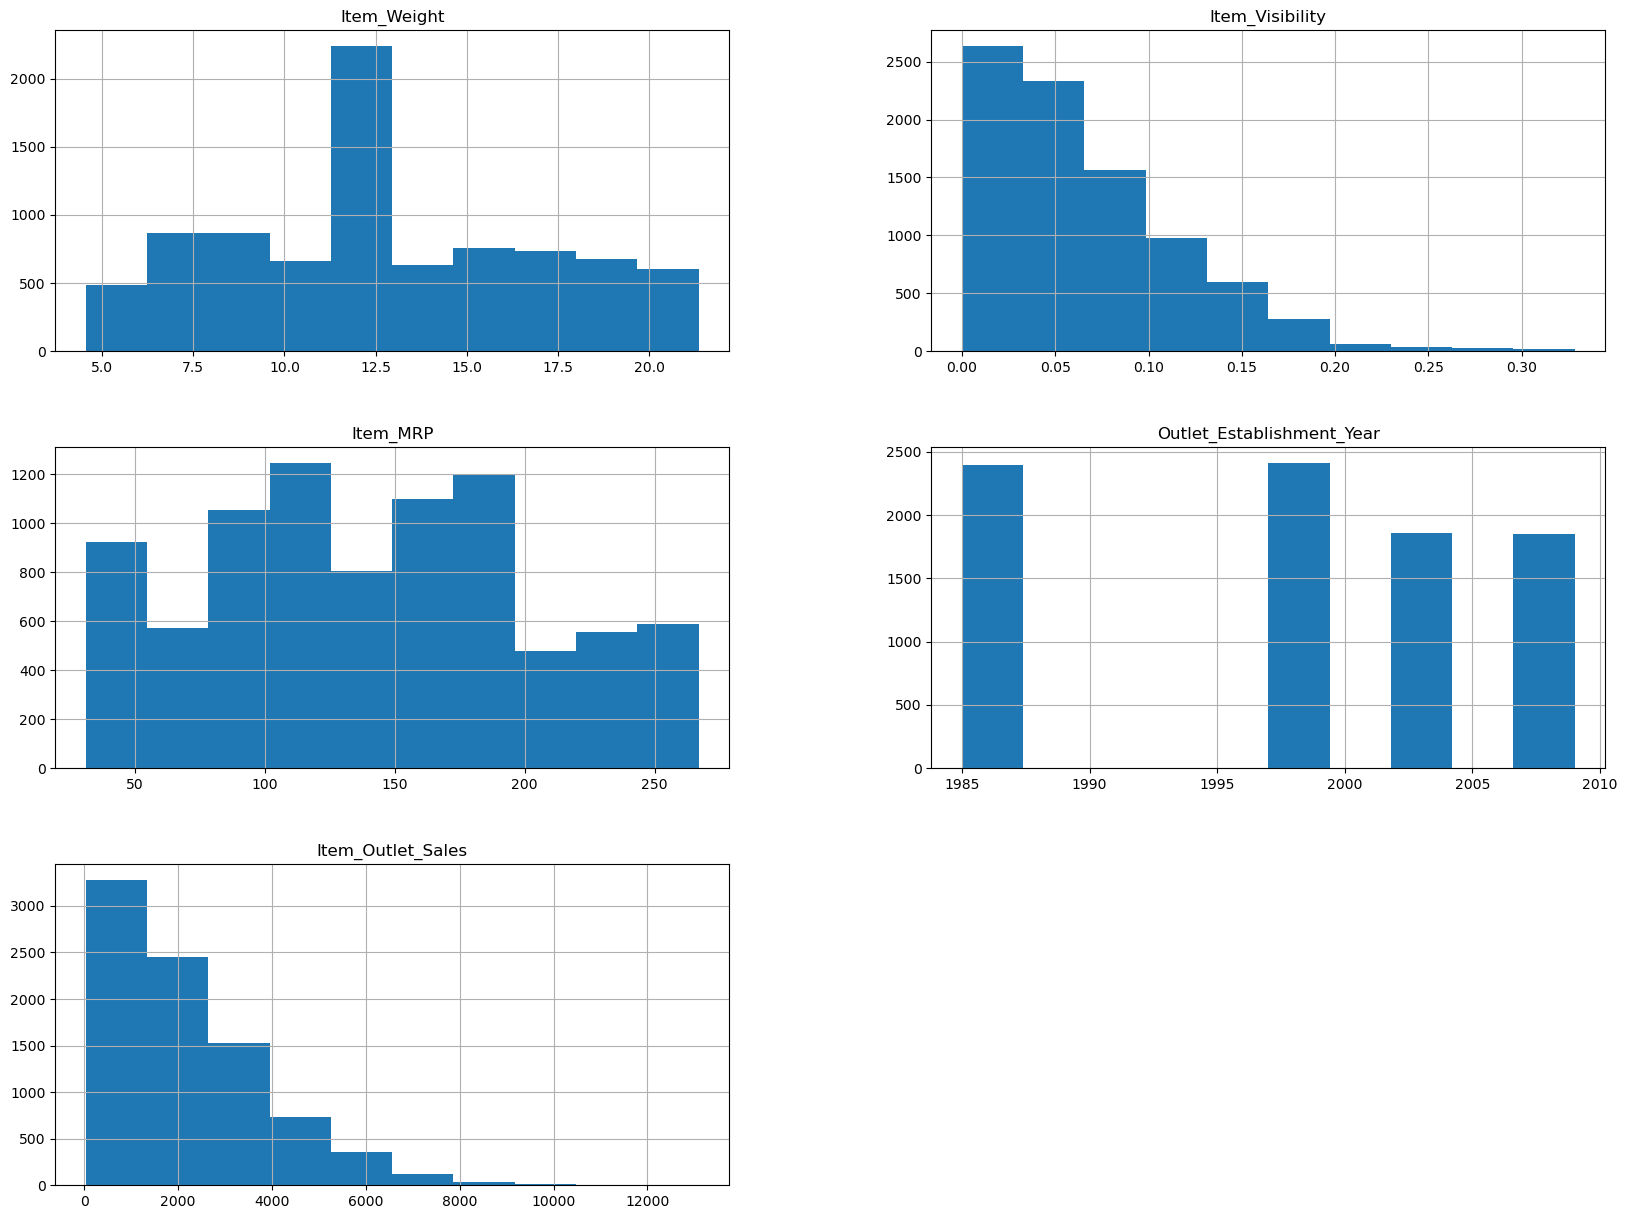

In [8]:
data.hist(figsize=(20, 15));

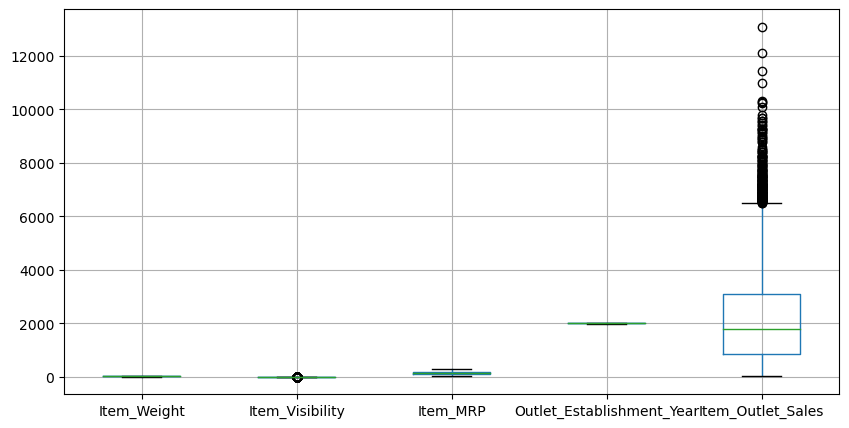

In [9]:
data.boxplot( figsize=(10, 5));

C:\Users\osama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


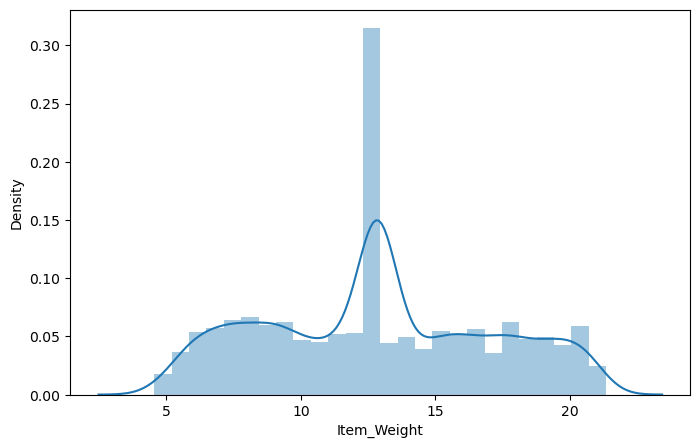

In [10]:
plt.figure(figsize=(8, 5))
sns.distplot(data["Item_Weight"])
plt.show()

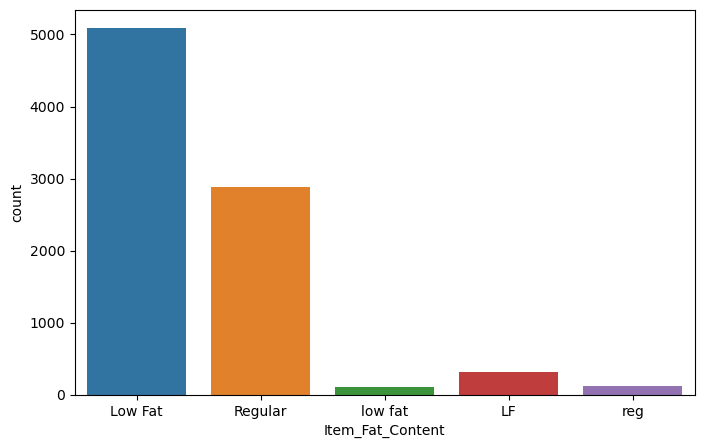

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x = "Item_Fat_Content", data=data)
plt.show()

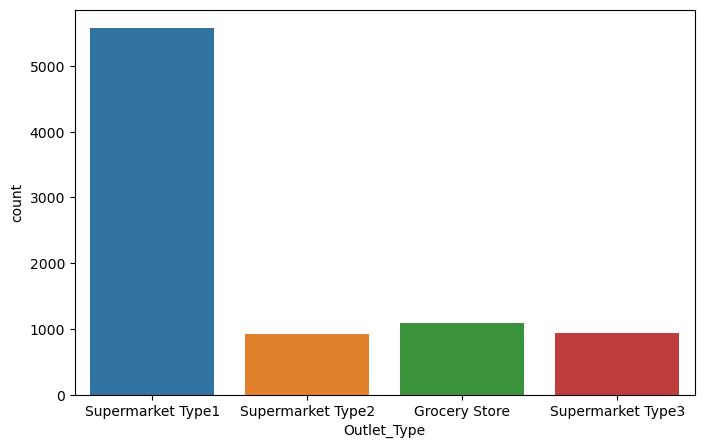

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x = "Outlet_Type", data=data)
plt.show()

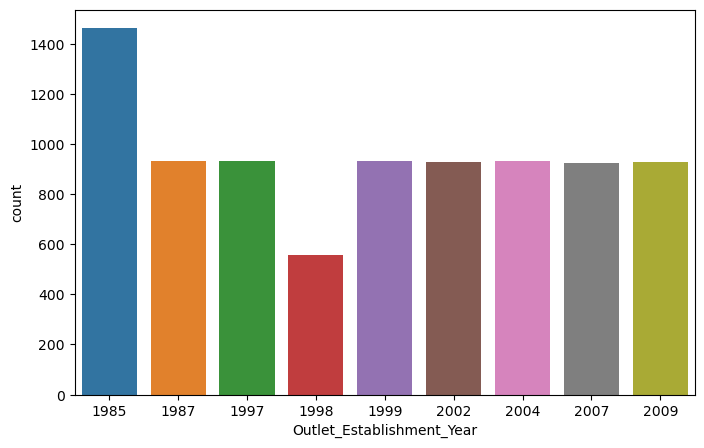

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x = "Outlet_Establishment_Year", data=data)
plt.show()

## Data Preprocessing

In [14]:
# Preprocessing & LabelEncoder

columns = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

La = LabelEncoder()

for col in columns:
    data[col] = La.fit_transform(data[col])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


## Splitting Data 

In [15]:
X = data.drop(columns="Item_Outlet_Sales", axis=1)
Y = data["Item_Outlet_Sales"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Building Model

In [16]:
model_RF = RandomForestRegressor(n_estimators=2000, max_depth=5000)
model_RF.fit(x_train, y_train)

print("The Accuracy SCore of Train Data is ", model_RF.score(x_train, y_train))
print("The Accuracy SCore of Test Data is ", model_RF.score(x_test, y_test))

The Accuracy SCore of Train Data is  0.9402752112930748
The Accuracy SCore of Test Data is  0.5670974321484974


In [42]:
Adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4, 
                                                                      min_samples_split=6,
                                                                      min_samples_leaf=4),
                              n_estimators=200,
                              learning_rate=0.001)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

The predict Score Train is ==> 0.5880843939175868
%----------------------------------------------------------%
The predict Score Test is ==> 0.612193786278703
